# Procesamiento de datos con Python

La presente clase está dirigida a cualquier alumno que ya sepa desenvolverse con cierta soltura en el desarrollo software con __Python__, esto supone comprender cómo trabajar con los elementos principales de sintaxis en Python como son bulces y condicionales, por otra parte, será necesario que el alumno haya trabajado con anterioriodad con DataFrames y listas, ya que, durante esta sesión se emplearán funciones involucradas en estas estructuras de datos.

Pese a que el módulo de estadística versa en su totalidad con el lenguaje de programación __R__, en esta sesión veremos cómo es posible también desde Python aplicar test estadísticos de forma sencilla y, otro tipo de transformaciones de datos que son comúnmente realizadas en proyectos de ciencia de datos, en las fases de pre-procesamiento y, procesamiento de datos.

Una vez tengamos los datos pre-procesado, es el momento de aplicar modelos de **Machine Learning**

### Dataset de la sesión: Churn_Modelling.csv

El dataset que utilizaremos para desarrollar toda la sesión será Churn_Modelling.csv el cuál, trata sobre el clásico ejemplo de predecir los clientes que abandonarán los servicios de una empresa (que se darán de baja), como tal, este dataset trata con información de una entidad bancaria, por lo tanto, vamos a intentar evitar que los clientes de un banco se den de baja de esta entidad. El dataset ha sido descargado de Kaggle https://www.kaggle.com/shrutimechlearn/churn-modelling

El dataset está compuesto por 10000 filas y 14 variables sobre las que disponemos de la siguiente información:

* __RowNumber__: Numérico. Número de fila.
* __CustomerId__: Numérico. ID del cliente en la entidad bancaria.
* __Surname__: Categórica con 2932 niveles. Apellido del cliente.
* __CreditScore__: Numérica. Puntuación de credit score, la calidad de la puntuación de un credit score es la siguiente:
  + Malo: Menos de 550 puntos.
  + Regular: 551 a 649 puntos.
  + Bueno: 700 a 749 puntos.
  + Excelente: 750 en adelante.
* __Geography__: Categórica con 3 niveles. País del cliente.
* __Gender__: Categórica de 2 niveles. Sexo del cliente.
* __Age__: Numérica, edad del cliente.
* __Tenure__: Numérica, número de años que lleva el cliente en el banco.
* __Balance__: Numérica, cuenta corriente del cliente. 
* __NumOfProducts__: Numérica, número de productos que utiliza el cliente en el banco.
* __HasCrCard__: Numérica binaria, tenencia (0) o no tenencia de tarjeta de crédito (1).
* __IsActiveMember__: Numérica binaria, indica si el cliente es activo (0) en su cuenta bancaria o no (1).
* __EstimatedSalary__: Numérica, salario estimado que puede tener el cliente en dólares.
* __Exited__: Numérica binaria. Variable objetivo, si el cliente cierra su cuenta 1 y 0 si el cliente mantiene su cuenta. 

Una vez conocemos información detallada sobre el dataset, simplemente lo cargams como dataframe a través de __Pandas__

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observamos que las columnas RowNumber y CustomerId, no tienen ningún aporte para nuestro análisis, no obstante, en un proyecto real, deberíamos considerar el id del cliente a la hora de predecir, pero no para entrenar. La variable Surname, al menos en este tipo de análisis no es interesante, ya que no estamos tratando como tal cadenas de texto. Por lo que, estas tres variables serán eliminadas. 

Las variables binarias, HasCrCard y IsActiveMember podrían ser tratadas de forma diferente ya que tiene más sentido recodificarlas a categórica, incluso, en futuros análisis, también podría recodificarase la varaible NumOfProducts a categórica, por el momento, no conocemos los productos para profundizar en su análisis, por lo que la dejaremos como numérica. 

Eliminamos ciertas variables del análisis.

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Procesamiento de datos (I) - Transformación de variables categóricas

Asignamos el tipo categórico a las variables que en la descripción del dataset aparecen como categóricas:

In [7]:
for column_ in ['Geography', 'Gender', "HasCrCard", "IsActiveMember"]:
    df[column_] = pd.Categorical(df[column_])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 586.6 KB


Recodificamos las variables binarias, excepto la variable Exited que es la variable objetivo. Para renombrar las categorías de una variable categórica, haremos uso de la función <code>__cat.rename_categories()__</code>

In [9]:
df['HasCrCard'] = df.HasCrCard.cat.rename_categories(["SI_CREDIT_CARD", 'NO_CREDIT_CARD'])
df['IsActiveMember'] = df.IsActiveMember.cat.rename_categories(["SI_ACTIVO", 'NO_ACTIVO'])

In [10]:
df.describe(include='category')

,Geography,Gender,HasCrCard,IsActiveMember
count,10000,10000,10000,10000
unique,3,2,2,2
top,France,Male,NO_CREDIT_CARD,NO_ACTIVO
freq,5014,5457,7055,5151


Observamos los valores únicos de las variables categóricas y su frecuencia.

In [11]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.HasCrCard.value_counts()

NO_CREDIT_CARD    7055
SI_CREDIT_CARD    2945
Name: HasCrCard, dtype: int64

In [14]:
df.IsActiveMember.value_counts()

NO_ACTIVO    5151
SI_ACTIVO    4849
Name: IsActiveMember, dtype: int64

Using matplotlib backend: <object object at 0x000001D11687DDD0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


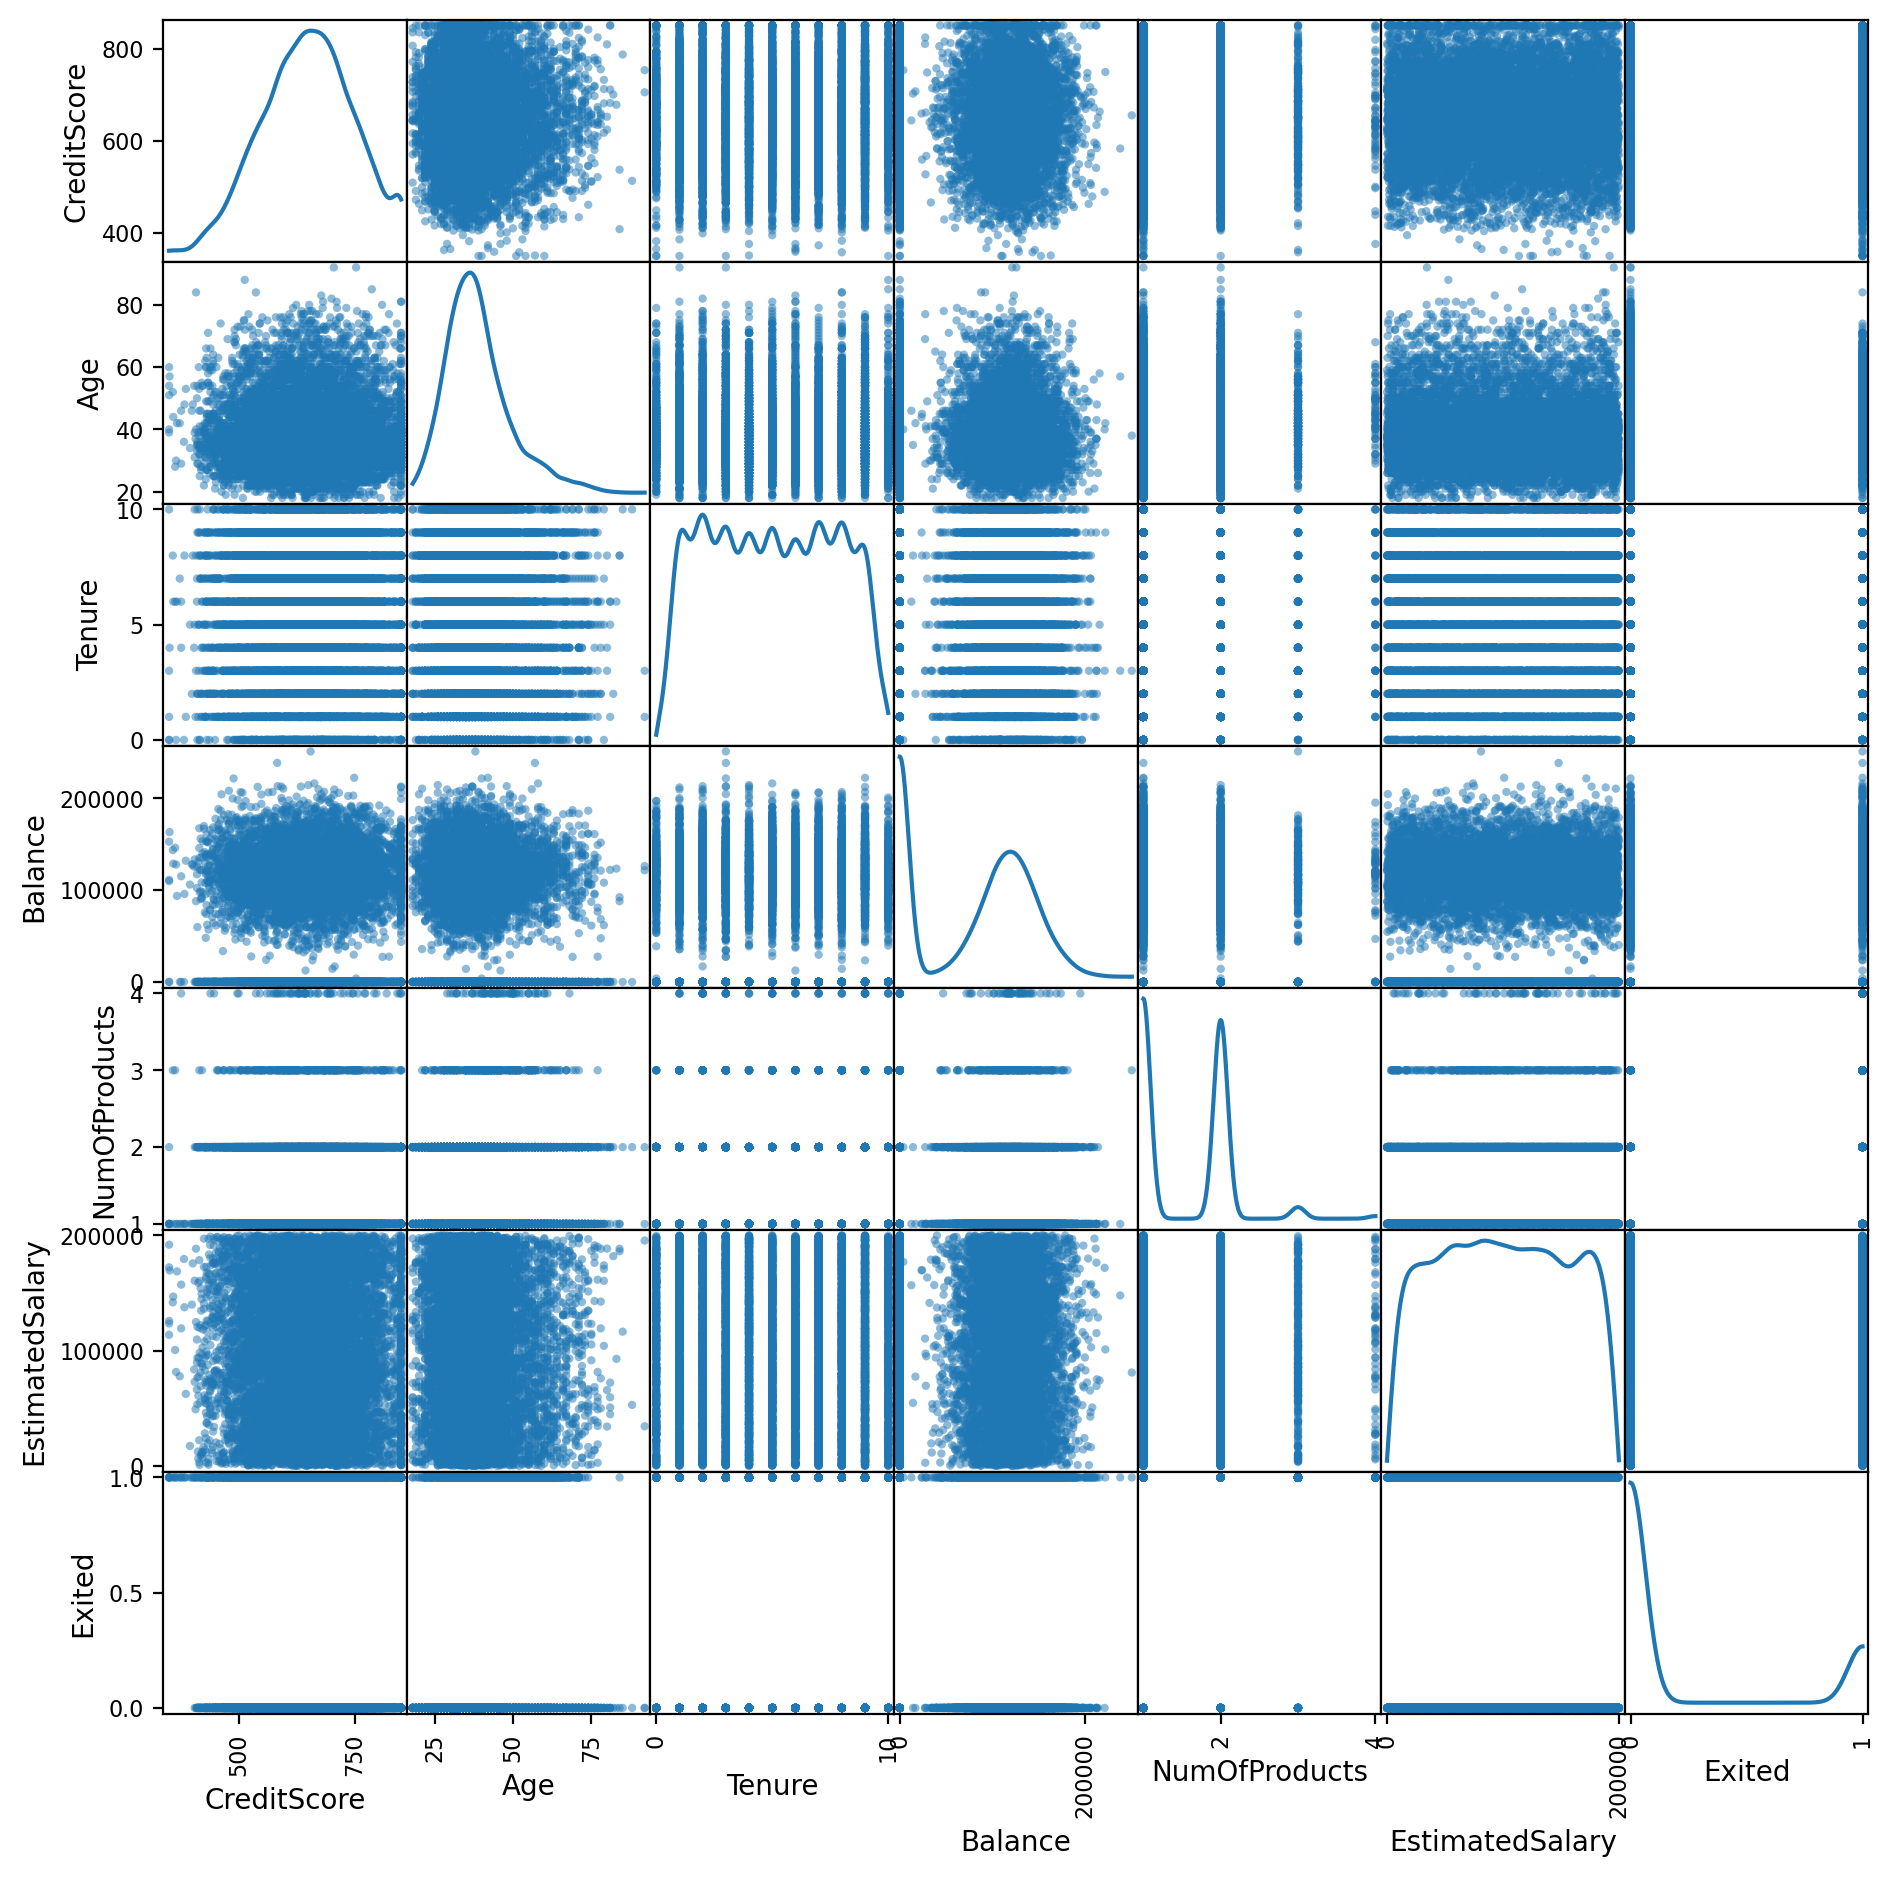

In [15]:
# Configuración para mostrar gráficas en notebook
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Importamos scatter_matrix
from pandas.plotting import scatter_matrix

# Es necesario que configuremos el tamaño de las gráficas que será el mismo que el número de columnas
scatter_matrix(df, figsize = (len(df.columns), 
                              len(df.columns)), 
               diagonal = 'kde');

### Procesamiento de datos (II) - Distribución de las variables contínuas.

Un proceso bastante extendido en proyectos de ciencia de datos es estudiar el sesgo y la varianza de las variables, con el objetivo de comprender si las diferentes distribuciones de las variables pueden afectar a las predicciones de un modelo, en el mundo real, es muy habitual que las variables numéricas de un dataset no procedan de una distribución normal, por lo que, dentro de los experimentos y pruebas que se realizan, las variables suelen estandarizarse o, normalizarse.

Antes de estandarizar una variable, es conveniente cerciorarnos de la distribución de la misma, siendo conocedores de si la variable en cuestión proviene de una distribución normal o no, para ello se emplean test estadísticos, en este caso, haremos uso del test de normalidad __shapiro__, disponible en la librería scipy.

El test de normalidad Shapiro nos sugiere lo siguiente en función del _p-value_ obtenido, como siempre, teniendo en cuenta un umbral de 0.05.

* p-value <= 0.05: __rechazamos hipótesis nula H0__, la muestra no proviene de una distribución normal, tomamos hipótesis alternativa H1.
* p-value > 0.05: __No rechazamos la hipótesis nula__, por lo tanto, asumimos que la mueestra proviene de una distribución normal

El test, nos devuelve dos valores, el valor estadístico del test y el p-value, nos centraremos en el uso del p-value para comprobar la normalidad de las variables.

In [16]:
from scipy.stats import shapiro

for columna_numerica  in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    # Aplicamos shapiro
    stat, p = shapiro(df[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))
    # Interpretación de resultados
    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' no proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.994, p-value=0.000
La variable  CreditScore  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.944, p-value=0.000
La variable  Age  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.949, p-value=0.000
La variable  Tenure  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.846, p-value=0.000
La variable  Balance  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.706, p-value=0.000
La variable  NumOfProducts  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.957, p-value=0.000
La variable  EstimatedSalary  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 



C:\Users\pere_\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Test o f-statistic, cuanto más cercano a 1 MEJOR, tiene más poder. Por los ejemplos de antes

Todas las variables tienen una distribución diferente a una distribución normal, no obstante, para comprobar que los cálculos son correctos, vamos a generar un array con número aleatorios que sigan una distribución normal para comprobar que el p-value, debería ser mayor a 0.05

In [17]:
from numpy import random

randn = random.randn(1000)
randn[0:3]

array([-0.03466161, -0.95671159, -0.14758683])

In [18]:
stat, p = shapiro(randn)
    
print('Valor de test=%.3f, p-value=%.3f' % (stat, p))

Valor de test=0.999, p-value=0.603


### Procesamiento de datos (III) - Variables dummy.

Una práctica incorrecta que a veces es más extendendida de lo que debería, es pasar a numéricas las variables categóricas, esto es un error estadístico, ya que las variables categóricas o cualitativas, describen precisamente una cualidad dejándo descartada la siguiente cualidad (factor, o etiqueta) disponible, por ejemplo: Una variable categórica que hayamos definido como altura con las etiquetas Alto o Bajo, un individuo solamente puede estar en una etiqueta, o es Alto o es Bajo, pero nunca las dos, lo mismo ocurriría por ejemplo con una variable llamda Sexo, con las etiquetas Mujer u Hombre, un individuo puede ser Mujer u Hombre pero nunca los dos.

De forma errónea, a veces se realiza la siguiente transformación de los valores, lo que en R sería el equivalente de realizar as.numeric() sobre una variable categórica.

* Mujer: 1
* Hombre: 2

De esta forma, podríamos obtener estadísticos como la media de la variable, pero por ejemplo, ¿qué quiere decir si una media es 1.4?, esto, no tiene sentido, los estadísticos más adecuados son la moda y, la frecuencia, es decir el valor más predominante y, el conteo de los mismos.

Para representar correctamente las variables categóricas como numéricas, ya que deben ser numéricas antes de utilizarlas en un modelo estadístico (a no ser que internamente el algoritmo esté programado para trabajar con variables categóricas), debemos pasar dichas variables a variables __dummy__. Las variables dummy se generan de forma binaria tomando valores 0 o 1 y, generándose una nueva columna para cada etiqueta o categoría. Por ejemplo, si tomamos dos filas de un dataframe en la que la fila 1 tiene valor Mujer y en la fila 2 tiene valor Hombre quedaría como:

<table>
<thead>
<tr>
<th></th>
<th>Sexo</th>
<th>Sexo_Hombre</th>
<th>Sexo_Mujer</th>
</tr>
</thead>
<tbody>
<tr>
<td>01</td>
<td>Mujer</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>02</td>
<td>Hombre</td>
<td>1</td>
<td>0</td>
</tr>

</tbody>
</table>

Es importante recalcar, que al obtener las variables dummies, desecharíamos la variable Sexo y, nos quedaríamos con las codificadas, es decir, Sexo_Hombre y Sexo_Mujer. Para realizar este procesamiento utilizaremos la función <code>__get_dummies__</code>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 586.6 KB


In [20]:
geography_dummy = pd.get_dummies(df.Geography, prefix='Geography')
gender_dummy = pd.get_dummies(df.Gender, prefix='Gender')
creditcard_dummy = pd.get_dummies(df.HasCrCard, prefix='CreditCard')
activemember_dummy = pd.get_dummies(df.IsActiveMember, prefix='ActiveMember')

In [21]:
geography_dummy.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [22]:
df = pd.concat([df, geography_dummy, gender_dummy, creditcard_dummy, activemember_dummy], axis=1)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditCard_SI_CREDIT_CARD,CreditCard_NO_CREDIT_CARD,ActiveMember_SI_ACTIVO,ActiveMember_NO_ACTIVO
0,619,France,Female,42,2,0.00,1,NO_CREDIT_CARD,NO_ACTIVO,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,Spain,Female,41,1,83807.86,1,SI_CREDIT_CARD,NO_ACTIVO,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,France,Female,42,8,159660.80,3,NO_CREDIT_CARD,SI_ACTIVO,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,France,Female,39,1,0.00,2,SI_CREDIT_CARD,SI_ACTIVO,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,Spain,Female,43,2,125510.82,1,NO_CREDIT_CARD,NO_ACTIVO,79084.10,0,0,0,1,1,0,0,1,0,1


Para automatizar también se puede realiar:

<code>df = pd.get_dummies(df, columns=['Geography', 'Gender', 'CreditCard', 'ActiveMember'])</code>

Eliminamos las variables origianles categóricas.



In [24]:
df = df.drop(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], axis = 1)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditCard_SI_CREDIT_CARD,CreditCard_NO_CREDIT_CARD,ActiveMember_SI_ACTIVO,ActiveMember_NO_ACTIVO
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


### Procesamiento de datos (IV) - Normalización del dataset.

Una vez hemos definido las variables categóricas como dummies, ya hemos visto anteriormente que ninguna de las variables del conjunto de variables numéricas procedía de una distribución normal, por lo tanto, podemos proceder a su normalización, aunque hay diferentes tipos de funciones para realizar estandarización de datos, una de las más comunes es la que nos provee la librería scikit-learn <code>__StandardScaler__</code>

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditCard_SI_CREDIT_CARD,CreditCard_NO_CREDIT_CARD,ActiveMember_SI_ACTIVO,ActiveMember_NO_ACTIVO
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,1,0,0,1,0,0,1,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,0,0,1,1,0,1,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,1,0,0,1,0,0,1,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,1,0,0,1,0,1,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,0,0,1,1,0,0,1,0,1


In [28]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditCard_SI_CREDIT_CARD,CreditCard_NO_CREDIT_CARD,ActiveMember_SI_ACTIVO,ActiveMember_NO_ACTIVO
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,-4.824585e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,-2.877698e-17,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700,0.29450,0.70550,0.484900,0.515100
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932,0.45584,0.45584,0.499797,0.499797
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.740268e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-8.535935e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,1.802807e-03,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.00000,0.000000,1.000000
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,8.572431e-01,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,1.737200e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
